# Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2

## a) Definimos el Generador Congruente Lineal utilizando los parámetros pedidos

In [2]:
m = 2e32
a = 1013904223
c = 1664525
def GCL_elemento(Un):
    return (a*Un + c) % m

In [3]:
u0 = np.array([89992, 90251, 98271, 98577]).mean()
u0

94272.75

In [4]:
## Generamos u1 a modo de prueba
u1 = GCL_elemento(u0)
u1

95583541003348.25

In [5]:
def GCL_vector(N, seed):
    v = np.empty(N)
    v[0] = seed
    for i in range(1,N):
        v[i] = GCL_elemento(v[i-1])
    return v

Vector de largo 100. Cantidad de bins según regla de Sturges: 2.5835612133952437e+31


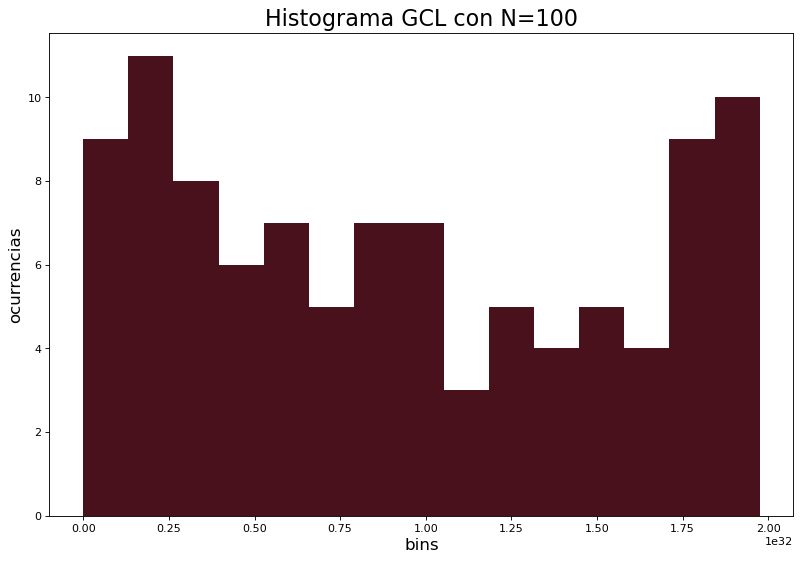

Vector de largo 2000. Cantidad de bins según regla de Sturges: 1.6714155693424285e+31


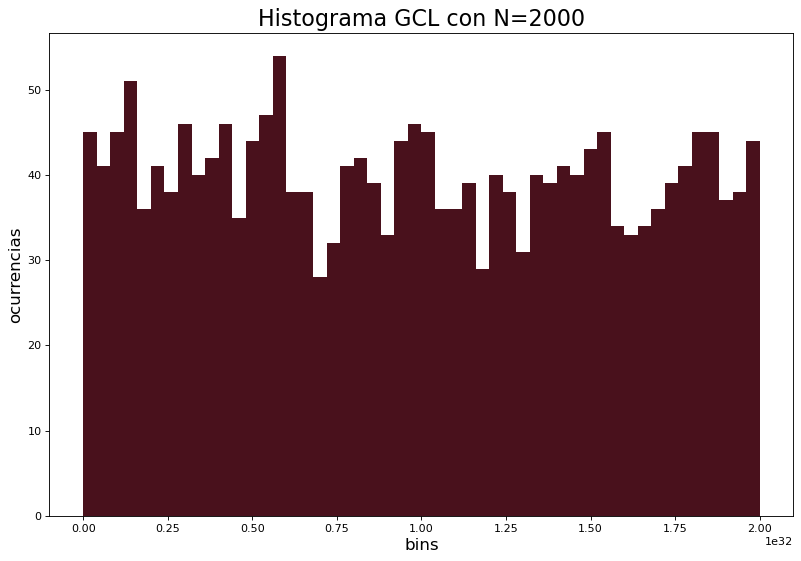

Vector de largo 30000. Cantidad de bins según regla de Sturges: 1.2600215338410036e+31


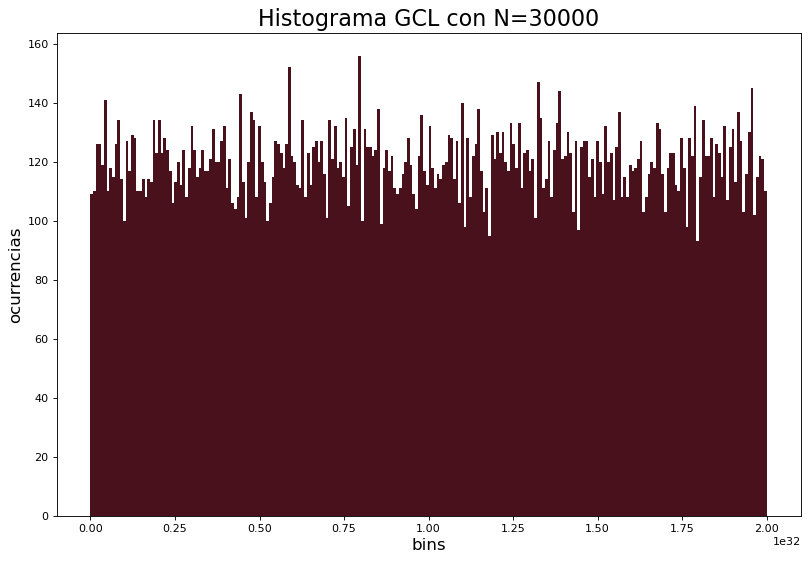

In [6]:
for N, bins in {100: 15, 2000: 50, 30000: 250}.items():
    
    x = GCL_vector(N, u0)
    ## Regla de Sturges para evaluar qué cantidad de bins es recomendable ##
    bins_Sturges = (x.max() - x.min())/(1+log2(N))
    print("Vector de largo {0}. Cantidad de bins según regla de Sturges: {1}".format(N, bins_Sturges))
        
    plt.figure(figsize=(12, 8), dpi=80)
    plt.title('Histograma GCL con N={0}'.format(N), size=20)
    plt.xlabel('bins', size=15)
    plt.ylabel('ocurrencias', size=15)
    plt.hist(x, bins = bins, color='#49111C')
    plt.show()

### b) Ahora modificaremos el GCL para que los valores que devuelva estén en el intervalo [0, 1]. Para esto, como es un generador lineal

In [7]:
def GCL_vector_normalizado(N, seed):
    v = GCL_vector(N+1, seed)
    return v[1:] * 1/m

Vector de largo 100. Cantidad de bins según regla de Sturges: 0.12917806066976217


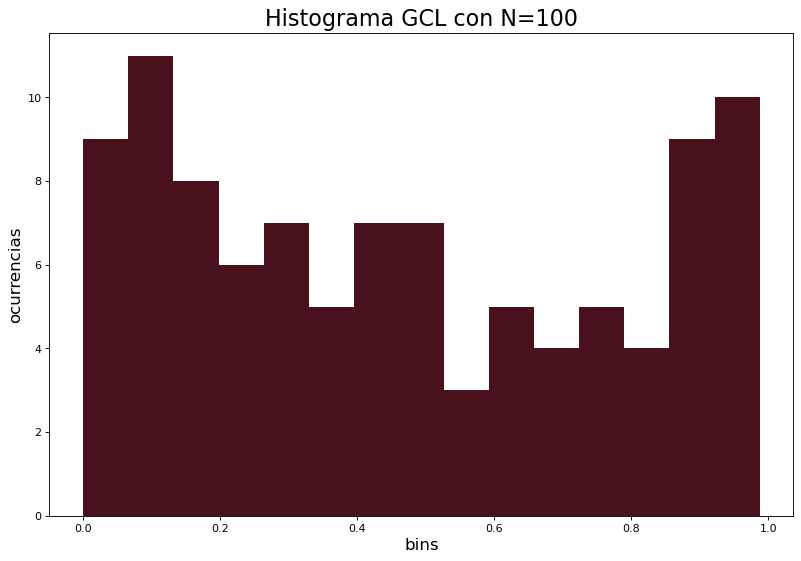

Vector de largo 2000. Cantidad de bins según regla de Sturges: 0.08357077846712142


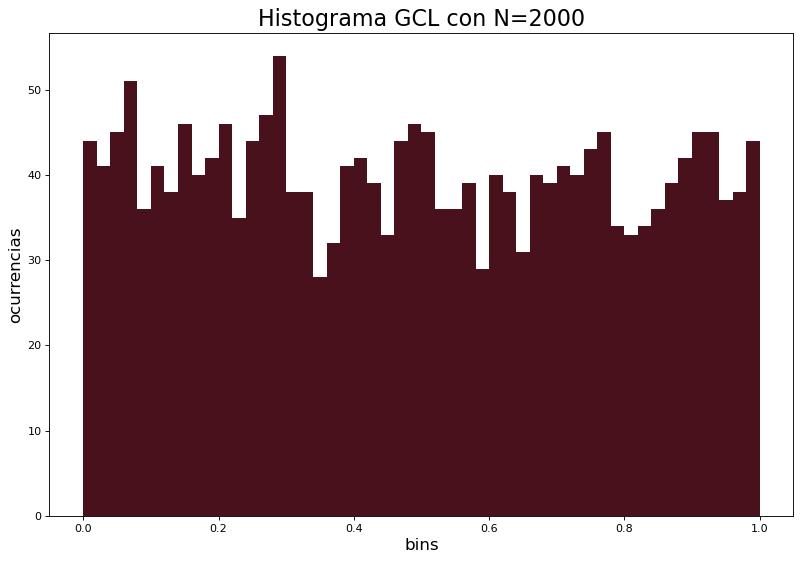

Vector de largo 30000. Cantidad de bins según regla de Sturges: 0.06300107669205017


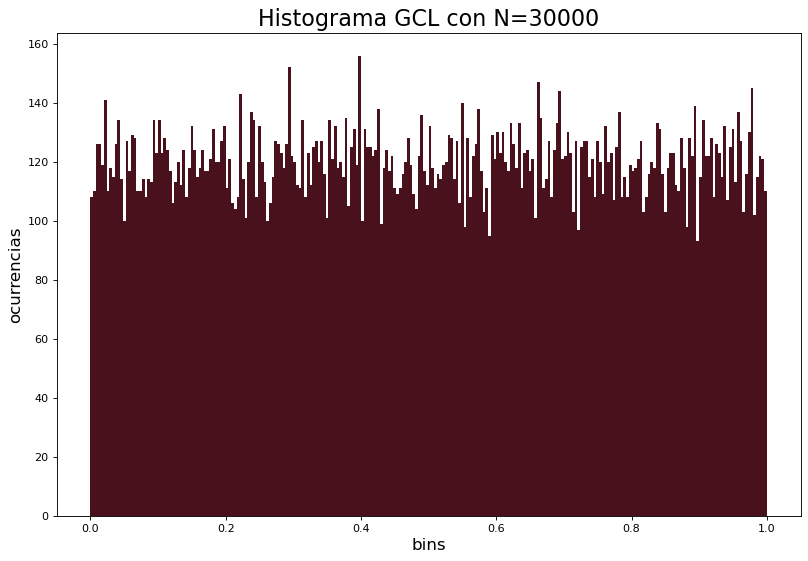

In [8]:
for N, bins in {100: 15, 2000: 50, 30000: 250}.items():
    
    x = GCL_vector_normalizado(N, u0)
    ## Regla de Sturges para evaluar qué cantidad de bins es recomendable ##
    bins_Sturges = (x.max() - x.min())/(1+log2(N))
    print("Vector de largo {0}. Cantidad de bins según regla de Sturges: {1}".format(N, bins_Sturges))
        
    plt.figure(figsize=(12, 8), dpi=80)
    plt.title('Histograma GCL con N={0}'.format(N), size=20)
    plt.xlabel('bins', size=15)
    plt.ylabel('ocurrencias', size=15)
    plt.hist(x, bins = bins, color='#49111C')
    plt.show()

### Todo: podría pensarse algún gráfico más para mostrar cómo funciona el GCL

# Ejercicio 2

## Test de frecuencia
Con este test buscaremos comprobar que los números generados se distribuyen de manera uniforme (ésta nuestra hipótesis nula, H0). Para ello vamos a utilizar nuestro GCL sin normalizar, y realizaremos un test de Chi2 suponiendo la existencia de m clases, todas ellas equiprobables. Es decir la probabilidad de cada clase será pi = 1/m.

Vamos a tomar para este test un nivel de significación de 0.05, y por lo tanto α = 0.95

In [9]:
from scipy.stats import chi2
α = 0.95
N = 30000
    
x = GCL_vector(N, u0)

suma = x.sum()
D2 = sum([(xi - 1/m*suma)**2 for xi in x])/(1/m*suma)

limiteSuperior = chi2.ppf(α, df=(m-1))
p_value = 1-chi2.cdf(D2, df=(m-1))
print("El estadistico D2 es {0} y el limite de la zona de aceptación|rechazo es {1}"
      .format(D2, limiteSuperior))
print("El p-value es {0} y nuestro nivel de significación es 0.05".format(p_value))
    
#    if D2 <= limiteSuperior:
#        print("El test acepta la hipotesis nula.")
#    else:
#        print("El test rechaza la hipótesis nula")

El estadistico D2 es 2.66525073585898e+64 y el limite de la zona de aceptación|rechazo es 2.0000000000000005e+32
El p-value es 0.0 y nuestro nivel de significación es 0.05


En primer lugar, el resultado del test nos permite aceptar holgadamente la hipótesis nula: **el GCL genera números pseudoaleatorios siguiendo una distribución uniforme**. Es necesario mencionar también la diferencia en órdenes de magnitud entre nuestro estadístico y el límite de la zona de aceptación. Esto nos permite decir que el GCL en cuestión es realmente robusto.

En segundo lugar, es necesario aclarar que no se realizó el test para cada una de los N tomados anteriormente, ya que el resultado nos permite asegurar que para todos los demás N la hipótesis nula también será aceptada. Esto fue comprobado, pero su ejecución no se adjunta

## Test espectral
Como la cátedra introdujo en las clases prácticas, sabemos que los GCL tienen la particularidad de exhibir comportamientos no deseados cuando se utiliza números generados consecutivamente para armar coordenadas (ya sea puntos en 2 dimensiones o en 3 dimensiones)

Vamos a probar el GCL propuesto (ésta vez utilizando su versión normalizada) para ver si podemos encontrar este comportamiento no deseado. Para ello, vamos a generar un array de 9.000 números, y vamos a utilizar la función reshape de numpy para agrupar estos puntos en arrays de 2 y 3 dimensiones.

Antes, una pequeña muestra de cómo funciona este método de la librería mencionada

In [10]:
test_reshape = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
reshaped_2d = np.reshape(test_reshape, (-1, 2))
print("El resultado en 2 dimensiones es:\n{0}".format(reshaped_2d))
reshaped_3d = np.reshape(test_reshape, (-1, 3))
print("El resultado en 3 dimensiones es:\n{0}".format(reshaped_3d))

El resultado en 2 dimensiones es:
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
El resultado en 3 dimensiones es:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [11]:
# Generamos 9.000 números normalizados y los agrupamos de dos en dos
N = 9000

flat_data = GCL_vector_normalizado(N, u0)
print(len(flat_data))

9000


(4500, 2)


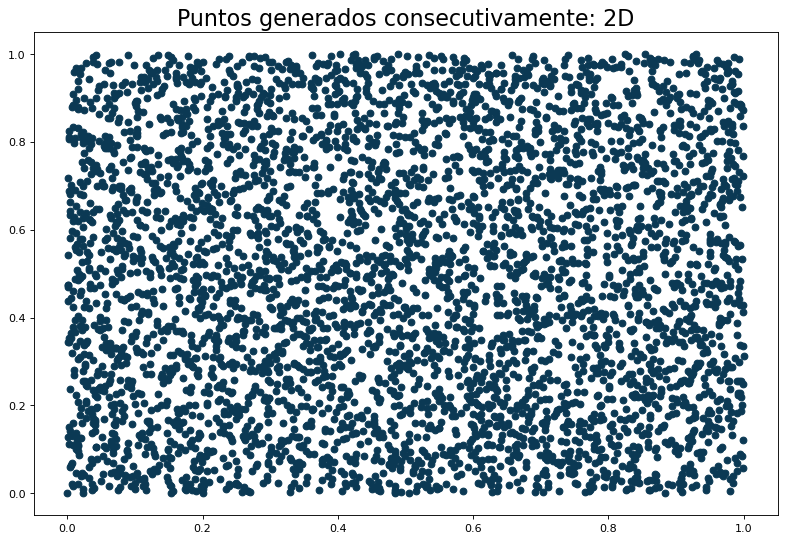

In [12]:
data = np.reshape(flat_data, (-1, 2))
print(data.shape)

x, y = data.T

plt.figure(figsize=(12, 8), dpi=80)
plt.title('Puntos generados consecutivamente: 2D', size=20)
plt.scatter(x, y, color='#0B3954')
plt.show()

(3000, 3)


<ipython-input-13-189f411875b6>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(projection='3d')


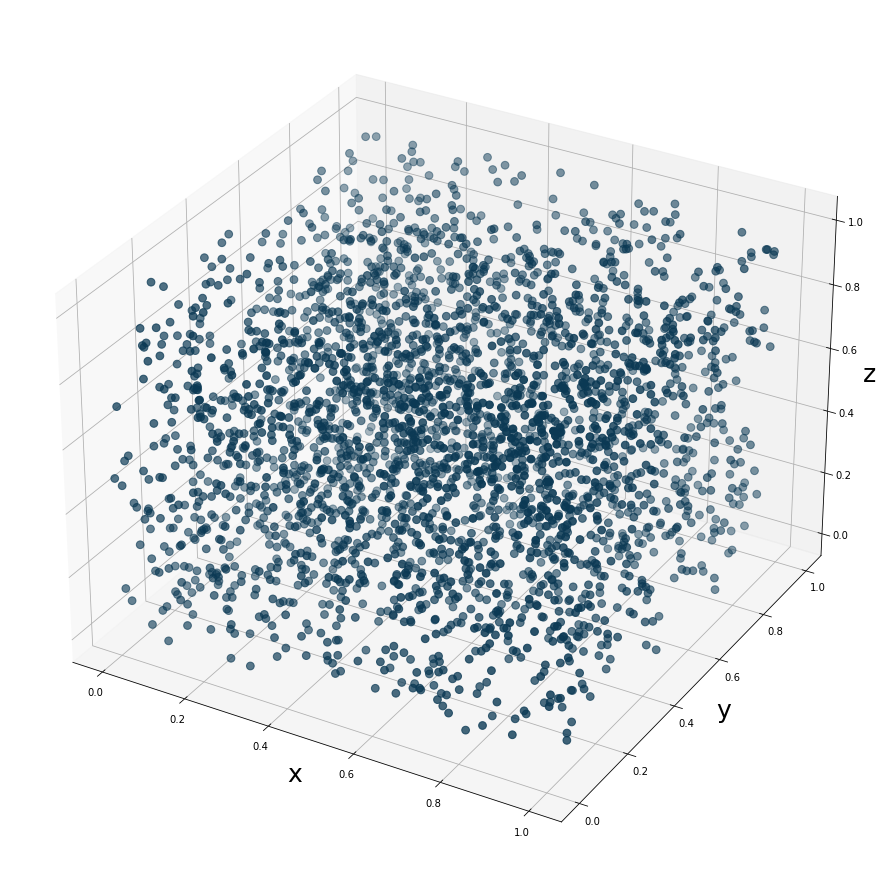

In [13]:
from mpl_toolkits.mplot3d import Axes3D 

data = np.reshape(flat_data, (-1, 3))
print(data.shape)

x, y, z = data.T

fig = plt.figure(figsize=(16, 16))
plt.title('Puntos generados consecutivamente: 3D', size=30)
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s = 60, color='#0B3954')
ax.set_xlabel('x', size=25)
ax.set_ylabel('y', size=25)
ax.set_zlabel('z', size=25)
plt.show()

A modo de conclusión, podemos afirmar una vez más que el GCL propuesto se comporta bien, no presenta en este caso anomalías a la hora de utilizarlo para generar coordenadas en 2 y 3 dimensiones, generando los puntos de manera consecutiva. Si las presentara, hubiéramos divisado rectas o hiperplanos, y este no fue el caso.